In [2]:
%matplotlib inline

import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR,SVC
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from scipy.stats import linregress
from scipy.stats import norm
from operator import itemgetter
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, scale
from sklearn import preprocessing, decomposition, cross_validation
from sklearn import utils
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression

In [3]:
dfTheseTeams = pd.read_csv('final-csv-data/NFL-Curr-Teams.csv')

dfOldTeams = pd.read_csv('final-csv-data/NFL-Prev-Teams.csv') #for cause of change in W/L look at NYPA,NYPF,NYYdsA,NYEXP stuff,NYoPtspG, NYSRS stuff, NYTotYds, NYRZPct, NYoRZPct,NYQbDYAR,NYAdjOLineYards,NYAdjDLineYards,NYOFFDVOA stuff,NYDEFDVOA stuff,NYSBWin
dfTheseTeams.head()

,Team,PA,YdsA,PlyA,pYPPa,TOa,FLa,T1stDa,PCmpa,PAtta,...,Unnamed: 260,DraftVal,PrevAV,CurrAV,AVChange,SBOdds,2YrWins,2YrAvg,QBAdded,SBWin
0,Cardinals,361,4973,1008,4.9,21,6,283,343,564,...,NaN,40.5,212,188,-24,10000,7,7.5,1.0,0
1,Falcons,315,5094,994,5.1,16,8,323,362,553,...,NaN,34.3,249,222,-27,1600,11,10.5,0.0,0
2,Ravens,303,5201,1045,5.0,34,12,296,333,569,...,NaN,54.8,205,221,16,5000,8,8.5,0.5,0
3,Bills,359,5682,1066,5.3,25,7,348,370,573,...,NaN,54.5,205,195,-10,8000,7,8.0,1.0,0
4,Panthers,327,5074,953,5.3,21,11,282,351,550,...,NaN,40.6,195,218,23,4000,6,8.5,0.0,0


In [4]:
theseTeamsTest = dfTheseTeams.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,31,33,34,35,36,37,38,39,40,42,43,44,49,50,58,59,60,61,62,63,64,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,124,127,129,130,131,132,133,134,135,136,137,139,140,141,142,143,147,149,150,151,159,160,161,163,164,165,166,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,190,192,194,195,197,198,199,200,203,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,235,236,237,238,239,240,241,242,246,247,248,250,251,252,253,254,255,256,257,261,262,263,264,265,266,267,268,269]]
oldTeamsTest = dfOldTeams.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,31,33,34,35,36,37,38,39,40,42,43,44,49,50,58,59,60,61,62,63,64,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,124,127,129,130,131,132,133,134,135,136,137,139,140,141,142,143,147,149,150,151,159,160,161,163,164,165,166,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,190,192,194,195,197,198,199,200,203,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,235,236,237,238,239,240,241,242,246,247,248,250,251,252,253,254,255,256,257,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,297,300,302,303,304,305,306,307,308,309,311,312,313,318,319,327,328,329,330,331,332,333,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,360,361,362,363,364,365,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,393,396,398,399,400,401,402,403,404,405,406,408,409,410,411,412,416,418,419,420,428,429,430,432,433,434,435,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,459,461,463,464,466,467,468,469,472,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,504,505,506,507,508,509,510,511,515,516,517,518,519,520,521,522,523,524,525,526,530,531,532,533,534,535,536,537,538]]


theseTeamsNames = dfTheseTeams.iloc[:,0]
oldTeamsNames = dfOldTeams.iloc[:,0]

theseTeamsTest.head()

,PA,YdsA,PlyA,pYPPa,TOa,FLa,T1stDa,PCmpa,PAtta,PYdsa,...,VAR,DraftVal,PrevAV,CurrAV,AVChange,SBOdds,2YrWins,2YrAvg,QBAdded,SBWin
0,361,4973,1008,4.9,21,6,283,343,564,3541,...,0.04,40.5,212,188,-24,10000,7,7.5,1.0,0
1,315,5094,994,5.1,16,8,323,362,553,3429,...,0.04,34.3,249,222,-27,1600,11,10.5,0.0,0
2,303,5201,1045,5.0,34,12,296,333,569,3421,...,0.11,54.8,205,221,16,5000,8,8.5,0.5,0
3,359,5682,1066,5.3,25,7,348,370,573,3688,...,0.05,54.5,205,195,-10,8000,7,8.0,1.0,0
4,327,5074,953,5.3,21,11,282,351,550,3665,...,0.05,40.6,195,218,23,4000,6,8.5,0.0,0


In [5]:
colArr = dfOldTeams.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,31,33,34,35,36,37,38,39,40,42,43,44,49,50,58,59,60,61,62,63,64,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,124,127,129,130,131,132,133,134,135,136,137,139,140,141,142,143,147,149,150,151,159,160,161,163,164,165,166,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,190,192,194,195,197,198,199,200,203,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,235,236,237,238,239,240,241,242,246,247,248,250,251,252,253,254,255,256,257,261,262,263,264,265,266,267,268,269]]
fyArr = dfOldTeams.iloc[:, [270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,297,300,302,303,304,305,306,307,308,309,311,312,313,318,319,327,328,329,330,331,332,333,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,360,361,362,363,364,365,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,393,396,398,399,400,401,402,403,404,405,406,408,409,410,411,412,416,418,419,420,428,429,430,432,433,434,435,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,459,461,463,464,466,467,468,469,472,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,504,505,506,507,508,509,510,511,515,516,517,518,519,520,521,522,523,524,525,526,530,531,532,533,534,535,536,537,538]]
rSquareArr = []
colUse = []
fyUse = []
for i in colArr:
    for j in fyArr:
        
        #plt.style.use('dark_background')

        #yardsAllRBs, ax = plt.subplots()
        
        slope,intercept, r_value, p_value, std_err = linregress(dfOldTeams[i], dfOldTeams[j])
        rsquaredArr1 = r_value**2
        rSquareArr.append(rsquaredArr1)
        colUse.append(i)
        fyUse.append(j)

        #ax.scatter(dfFYRBs[i], dfFYRBs[j], color = 'orange', label = "Running backs")
        #ax.axvline(x = np.mean(dfFYRBs[i]), color = 'white')
        #ax.axhline(y = np.mean(dfFYRBs[j]), label = "Average", color = 'white')
        #yardsAllRBs.suptitle("Correlation between "+i+" and "+j, weight = 'bold', size = 18, y = 1.05)
        #ax.set_xlabel(i)
        #ax.set_ylabel(j)

        #ax.plot(np.unique(dfFYRBs[i]), np.poly1d(np.polyfit(dfFYRBs[i], dfFYRBs[j],1))(np.unique(dfFYRBs[i])))

        #ax.legend(loc='best', prop={'size':9, "family":"DejaVu Sans"})
        #rpString = "r = " + str(round(r_value,3)) + ", p = " + str(round(p_value,3))+ ", rsquared = " + str(round(rsquaredArr1, 3))

        #ax.set_title("%s"%rpString, size = 12, fontname = 'DejaVu Sans')
        #yardsAllRBs.savefig('newGraphs/CollegetoNFL-correlation'+i+'to'+j+'.png', dpi = 400, bbox_inches = 'tight')
#for n,m,f in zip(rSquareArr,colUse,fyUse):
 #   print(n,m,f)


C:\Users\Kids\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Kids\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Kids\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [6]:
#plt.style.use('seaborn-poster')

#compareStats, ax = plt.subplots()

statsGraph = []
for i in rSquareArr:
    statsGraph.append(float(i))
combinedStats = [[i,j,k] for i,j,k in zip(statsGraph,colUse,fyUse)]


sortedRSquared = sorted(combinedStats, key = itemgetter(1))
#print(sortedRSquared)

sortedRSquaredData = [row[0] for row in sortedRSquared]

In [15]:
train, test = train_test_split(dfOldTeams, test_size = 0.25, random_state = 99)

xtrainRB = train[['PA','YdsA','PlyA','pYPPa','TOa','FLa','T1stDa','PCmpa','PAtta','PYdsa','PTDa','Inta','NYPAa','p1stDa','Atta','RYdsa','TDa','YPAa','1stDa','Pena','PenYdsa','1stPya','ScPerca','TOPerca','dEXP','CmpPerca','TDPerca','IntPerca','pYpAa','AYpAa','YpCa','YpGa','Ratea','Skf','SkYds','ANYpAa','SkPercf','pdEXP','rYpGa','rdEXP','oAllTD','o2PM','o2PA','oXPM','oXPA','oFGM','oFGA','oPtspG','o3DAtt','o3DConv','o3DPerc','o4DAtt','o4DConv','o4DPerc','oRZAtt','oRZScore','oRZPct','oNumDr','oPlays','oScPerc','oTOPerc','oPlaysPD','oYdsPD','oStart','oTimePD','oPtsPD','W','L','WLPerc','PF','PD','MoV','SoS','SRS','OSRS','DSRS','TotYds','Ply','YpP','TO','FL','Pa1stD','PCmp','PAtt','PYds','PTD','Int','NYpA','p1stD','Att','rYds','TD','YpA','1stD','Pen','PenYds','1stPy','ScoPerc','TORPerc','EXP','CmpPerc','TDPerc','IntPerc','pLng','pYpA','pAYpA','YpC','pYpG','Rate','Sk','SkYdsa','pANYpA','SkPerc','4QC','GWD','pEXP','Lng','YpG','Fmb','rEXP','AllTD','2PaM','2PA','XPM','XPA','FGM','FGA','PtspG','3DAtt','3DConv','3DPerc','4DAtt','4DConv','4DPerc','RZAtt','RZScore','RZPct','NumDr','Plays','ScPerc','TOPerc','PlaysPD','YdsPD','Start','Time','Pts','QbDYAR','QbYAR','QbDVOA','QbVOA','QBR','QbPass','QbYards','EYds','QbTD','QbINT','ALEX','AdjOLineYards','RBYards','PowerSuccess','PowerRank','Stuffed','StuffedRank','2ndLevelYards','2ndLevelRank','OpenFieldYards','OpenFieldRank','Sacks','AdjustedSackRate','AdjDLineYards','dRBYards','dPowerSuccess','dPowerRank','dStuffed','dStuffedRank','d2ndLevelYards','d2ndLevelRank','dOpenFieldYards','dOpenFieldRank','dSacks','dAdjustedSackRate','OFFDVOA','LASTYEARODVOA','WEIOFFENSE','PASSOFF','PASSRANK','RUSHOFF','RUSHRANK','TOTALOFF','PASSDVOA','RUSHDVOA','oVAR','DEFDVOA','LASTYEARDEFDVOA','WEIDEFENSE','PASSDEF','PASSDEFRANK','RUSHDEF','RUSHDEFRANK','TOTALDEF','PASSDEFWEI','RUSHDEFWEI','VAR','DraftVal','PrevAV','CurrAV','AVChange','SBOdds','2YrWins','2YrAvg','QBAdded','SBWin']]
ytrainRB = train[['NYW']].astype(int)

xtestRB = test[['PA','YdsA','PlyA','pYPPa','TOa','FLa','T1stDa','PCmpa','PAtta','PYdsa','PTDa','Inta','NYPAa','p1stDa','Atta','RYdsa','TDa','YPAa','1stDa','Pena','PenYdsa','1stPya','ScPerca','TOPerca','dEXP','CmpPerca','TDPerca','IntPerca','pYpAa','AYpAa','YpCa','YpGa','Ratea','Skf','SkYds','ANYpAa','SkPercf','pdEXP','rYpGa','rdEXP','oAllTD','o2PM','o2PA','oXPM','oXPA','oFGM','oFGA','oPtspG','o3DAtt','o3DConv','o3DPerc','o4DAtt','o4DConv','o4DPerc','oRZAtt','oRZScore','oRZPct','oNumDr','oPlays','oScPerc','oTOPerc','oPlaysPD','oYdsPD','oStart','oTimePD','oPtsPD','W','L','WLPerc','PF','PD','MoV','SoS','SRS','OSRS','DSRS','TotYds','Ply','YpP','TO','FL','Pa1stD','PCmp','PAtt','PYds','PTD','Int','NYpA','p1stD','Att','rYds','TD','YpA','1stD','Pen','PenYds','1stPy','ScoPerc','TORPerc','EXP','CmpPerc','TDPerc','IntPerc','pLng','pYpA','pAYpA','YpC','pYpG','Rate','Sk','SkYdsa','pANYpA','SkPerc','4QC','GWD','pEXP','Lng','YpG','Fmb','rEXP','AllTD','2PaM','2PA','XPM','XPA','FGM','FGA','PtspG','3DAtt','3DConv','3DPerc','4DAtt','4DConv','4DPerc','RZAtt','RZScore','RZPct','NumDr','Plays','ScPerc','TOPerc','PlaysPD','YdsPD','Start','Time','Pts','QbDYAR','QbYAR','QbDVOA','QbVOA','QBR','QbPass','QbYards','EYds','QbTD','QbINT','ALEX','AdjOLineYards','RBYards','PowerSuccess','PowerRank','Stuffed','StuffedRank','2ndLevelYards','2ndLevelRank','OpenFieldYards','OpenFieldRank','Sacks','AdjustedSackRate','AdjDLineYards','dRBYards','dPowerSuccess','dPowerRank','dStuffed','dStuffedRank','d2ndLevelYards','d2ndLevelRank','dOpenFieldYards','dOpenFieldRank','dSacks','dAdjustedSackRate','OFFDVOA','LASTYEARODVOA','WEIOFFENSE','PASSOFF','PASSRANK','RUSHOFF','RUSHRANK','TOTALOFF','PASSDVOA','RUSHDVOA','oVAR','DEFDVOA','LASTYEARDEFDVOA','WEIDEFENSE','PASSDEF','PASSDEFRANK','RUSHDEF','RUSHDEFRANK','TOTALDEF','PASSDEFWEI','RUSHDEFWEI','VAR','DraftVal','PrevAV','CurrAV','AVChange','SBOdds','2YrWins','2YrAvg','QBAdded','SBWin']]
ytestRB = test[['NYW']].astype(int)

#knn = KNeighborsClassifier(n_neighbors=5)
#knn.fit(xtrainRB,ytrainRB)
#knn.score(xtestRB,ytestRB)
#print(knn.kneighbors(xtrain, return_distance=False))

In [16]:
linReg = linear_model.LinearRegression(fit_intercept = False)
linReg.fit(xtrainRB,ytrainRB)

y_predLinRB = linReg.predict(xtestRB)
linR2RB = abs(1/(r2_score(ytestRB,y_predLinRB)))
print("Mean squared error: %.3f"%mean_squared_error(ytestRB, y_predLinRB))
print("Variance score: %.3f"%r2_score(ytestRB,y_predLinRB))

cvScoreLin = cross_val_score(linReg,xtestRB,ytestRB,cv=4,scoring='explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)"%(cvScoreLin.mean(), cvScoreLin.std()*2))
print(linR2RB)

Mean squared error: 31.519
Variance score: -2.439
Accuracy (cross validation score): -18.66 (+/- 49.43)
0.4099887064253649


In [17]:
ridgeReg = linear_model.Ridge(alpha=5, fit_intercept = False)
ridgeReg.fit(xtrainRB,ytrainRB)

y_predRidgeRB = ridgeReg.predict(xtestRB)
ridgeR2RB = abs(1/(r2_score(ytestRB,y_predRidgeRB)))
print("Mean squared error: %.3f"%mean_squared_error(ytestRB, y_predRidgeRB))
print("Variance score: %.3f"%r2_score(ytestRB,y_predRidgeRB))

cvScoreRidge = cross_val_score(ridgeReg,xtestRB,ytestRB,cv=4,scoring='explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)"%(cvScoreRidge.mean(), cvScoreRidge.std()*2))
print(ridgeR2RB)

Mean squared error: 30.495
Variance score: -2.327
Accuracy (cross validation score): -18.66 (+/- 49.43)
0.429668487015473


In [18]:
lassoReg = linear_model.Lasso(alpha = 5, tol = 0.1, max_iter = 100000, fit_intercept = False)
lassoReg.fit(xtrainRB,ytrainRB)

y_predLassoRB = lassoReg.predict(xtestRB)
lassoR2RB = abs(1/(r2_score(ytestRB,y_predLassoRB)))
print("Mean squared error: %.3f"%mean_squared_error(ytestRB, y_predLassoRB))
print("Variance score: %.3f"%r2_score(ytestRB,y_predLassoRB))

cvScoreLasso = cross_val_score(lassoReg,xtestRB,ytestRB,cv=4,scoring='explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)"%(cvScoreLasso.mean(), cvScoreLasso.std()*2))

print(lassoR2RB)

Mean squared error: 6.757
Variance score: 0.263
Accuracy (cross validation score): -0.87 (+/- 3.43)
3.805985253252553


In [19]:
logReg = linear_model.LogisticRegression(fit_intercept = False, dual=False)
logReg.fit(xtrainRB,ytrainRB)

y_predLogRB = logReg.predict(xtestRB)

print("Mean squared error: %.3f"%mean_squared_error(ytestRB, y_predLogRB))
print("Variance score: %.3f"%r2_score(ytestRB,y_predLogRB))

Mean squared error: 12.458
Variance score: -0.359


C:\Users\Kids\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


72
[11.88063319] Cardinals
[7.05731587] Falcons
[7.18375302] Ravens
[7.132038] Bills
[6.89271692] Panthers
[9.13294885] Bears
[11.96102038] Bengals
[10.73239156] Browns
[9.27351331] Cowboys
[5.15829026] Broncos
[9.58923384] Lions
[10.1327699] Packers
[7.75883229] Texans
[10.49463606] Colts
[7.85540934] Jaguars
[7.02724248] Chiefs
[7.58800858] Chargers
[6.47892864] Rams
[7.32890315] Dolphins
[7.80034059] Vikings
[5.29483281] Patriots
[7.15882072] Saints
[7.99904206] Giants
[7.26204969] Jets
[5.05896602] Raiders
[9.25915068] Eagles
[9.00555635] Steelers
[9.32258455] 49ers
[8.02060717] Seahawks
[5.95394182] Buccaneers
[10.38952323] Titans
[7.45092521] Redskins


(-0.2, 5.2)

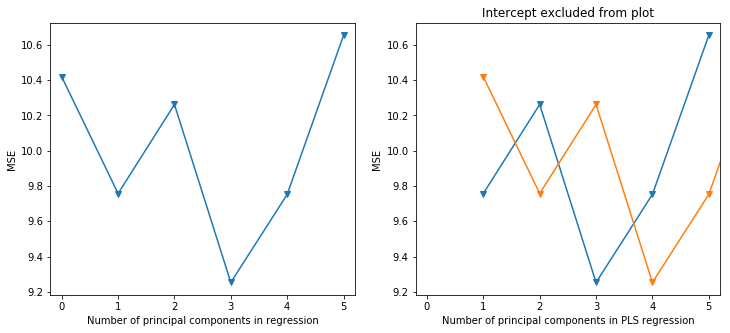

In [20]:
logistic = linear_model.LinearRegression()
pca = PCA()
x = xtestRB
y = ytestRB
y2 = y.values.flatten()
x_reduced = pca.fit_transform(scale(xtestRB))
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)

n=len(x_reduced)
kf_10=cross_validation.KFold(n,n_folds=10,shuffle=True,random_state=2)

mse = []
score = -1*cross_validation.cross_val_score(logistic, np.ones((n,1)), y2, cv=kf_10, scoring='neg_mean_squared_error').mean()
mse.append(score)

for i in np.arange(1,6):
    score = -1*cross_validation.cross_val_score(logistic, x_reduced[:,:i], y2, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
print(len(xtrainRB))
X_train_pca = pca.transform(xtrainRB)
X_test_pca = pca.transform(xtestRB)
logistic.fit(X_train_pca,ytrainRB)
y_pred = logistic.predict(X_train_pca)
for i,j in zip(y_pred, theseTeamsNames):
    print(i,j)
    
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(mse,'-v')
ax2.plot([1,2,3,4,5],mse[1:6],'-v')
ax2.set_title('Intercept excluded from plot')

for ax in fig.axes:
    ax.set_xlabel('Number of principal components in regression')
    ax.set_ylabel('MSE')
    ax.set_xlim((-0.2,5.2))
    
    
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i,scale=False)
    pls.fit(scale(x),y)
    score = cross_validation.cross_val_score(pls, x_reduced[:,:i], y, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 12), np.array(mse), '-v')
plt.xlabel('Number of principal components in PLS regression')
plt.ylabel('MSE')
plt.xlim((-0.2, 5.2))


In [ ]:
linear_rbs = linReg.predict(theseTeamsTest)
for i,j in zip(linear_rbs, theseTeamsNames):
    print(i,j)

In [ ]:
ridge_rbs = ridgeReg.predict(theseTeamsTest)
for i,j in zip(ridge_rbs, theseTeamsNames):
    print(i,j)

In [ ]:
lasso_rbs = lassoReg.predict(theseTeamsTest)
for i,j in zip(lasso_rbs, theseTeamsNames):
    print(i,j)

In [ ]:
log_rbs = logReg.predict(theseTeamsTest)
for i,j in zip(log_rbs, theseTeamsNames):
    print(i,j)

In [ ]:
averageProd = []
for i,j,h in zip(linear_rbs,ridge_rbs,lasso_rbs):
    #averageProd.append(float((i*linR2RB+j*ridgeR2RB+h*lassoR2RB)/(linR2RB+ridgeR2RB+lassoR2RB)))
    averageProd.append(float((i+j+h)/3))

combinedAvg = [[i,j] for i,j in zip(theseTeamsNames, averageProd)]

sortedAvg = sorted(combinedAvg, key = itemgetter(1))
print(sortedAvg)

#this average is raw talent average, got rid of 16,17 in FYRB struct (draftpos and dcpos)